# <span style="color:blue">Machine Learning project on mpg (milage) dataset </span>
    
    
    mpg (milage) dataset from seaborn library is used in this project to build to a machine       learning project which predict milage on the basis of input other input features such as     weigth,acceleration,cylinders,horsepower,modelyear etc
    
    We will be building Supervised machine learning model to train our mpg data and predict
    milage . mpg feature(column) will be used as target/label 
    

# Overview

**Machine learning**- Machine Learning is the field of study that gives computers the          ability to learn without being explicitly programmed.

A computer program is said to learn from experience E with respect to some task T
and some performance measure P, if its performance on T, as measured by P, improves
with experience E.

**Supervised Machine learning** - In supervised learning, the training data you feed to the algorithm includes the desired solutions, called labels/targets

    we will be  using Regression model in this project . 

**Regression** - finding value of dependent feature on the basis of independent features.
In our case mpg is dependent feature and rest of the features are independent. regression is 
used to predict value of continous feature.




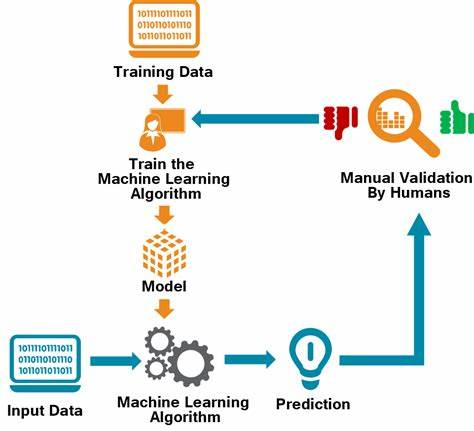

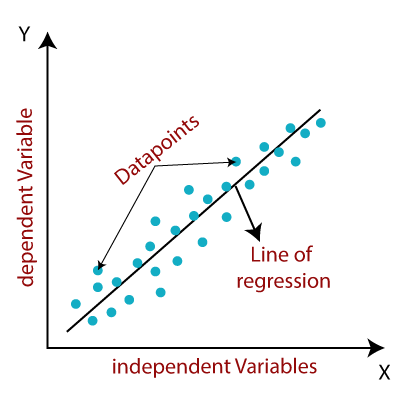

In [51]:
#----------------- EDA Libraries-------------------------------------
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**EDA-exploratory data anaylsis** 

In [52]:
mpg = sns.load_dataset("mpg")
mpg.head() #checking the dataset .

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [53]:
#shape of our dataset . how many rows and columns are present . 
mpg.shape

(398, 9)

In [54]:
# `origin` is a categorical column we have only three categories in origin . 
mpg.groupby("origin")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


    *Insights*
    1.we can see that ``usa`` has most count . it means most of the cars belongs to usa. 
    2.Japan has cars with highest milage (mpg) which is 30.45 and USA has lowest milage.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

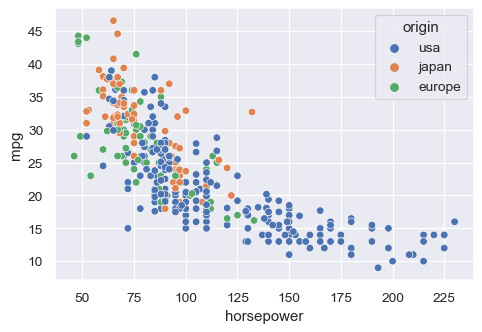

In [55]:
#seaborn is used in data visualization .we are making scatter plot between mpg and horsepower
#and checking how the data points are scatter on the basis of origin.
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="origin") 

In [56]:
#cylinder is also a categorical column .it ranges from 3 to 8.
mpg["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

<span style='color:orange'>hue arguement is used to show the distribution of categories</span>

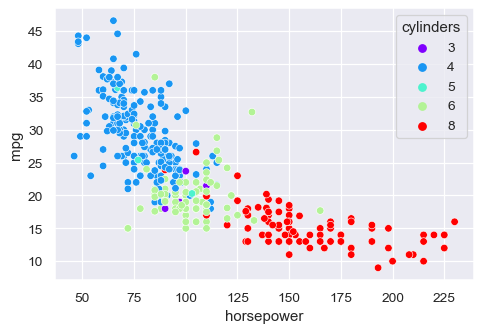

In [57]:
#we can how number of cylinders affecting the milage. 
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="cylinders", palette="rainbow")
plt.show()

In [58]:
#we can do same for model year which is also a categorical column . 
mpg.groupby("model_year")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
model_year,,,,,,,,
70,29.0,17.689655,5.339231,9.0,14.000,16.00,22.000,27.0
71,28.0,21.250000,6.591942,12.0,15.500,19.00,27.000,35.0
72,28.0,18.714286,5.435529,11.0,13.750,18.50,23.000,28.0
73,40.0,17.100000,4.700245,11.0,13.000,16.00,20.000,29.0
74,27.0,22.703704,6.420010,13.0,16.000,24.00,27.000,32.0
75,30.0,20.266667,4.940566,13.0,16.000,19.50,23.000,33.0
76,34.0,21.573529,5.889297,13.0,16.750,21.00,26.375,33.0
77,28.0,23.375000,6.675862,15.0,17.375,21.75,30.000,36.0
78,36.0,24.061111,6.898044,16.2,19.350,20.70,28.000,43.1


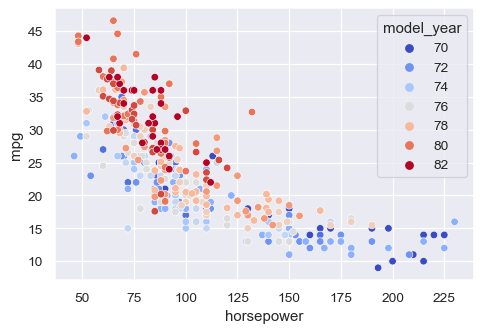

In [59]:
#distribution of model year 
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="model_year", palette="coolwarm")
plt.show()

`insights`

    we can se that milage is increasing over the years. 

###  <span style="color:red">To see how mpg is dependent on other features we can visualize the data into scatter plots. </span>


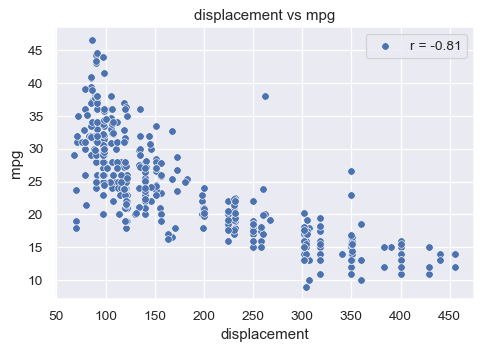

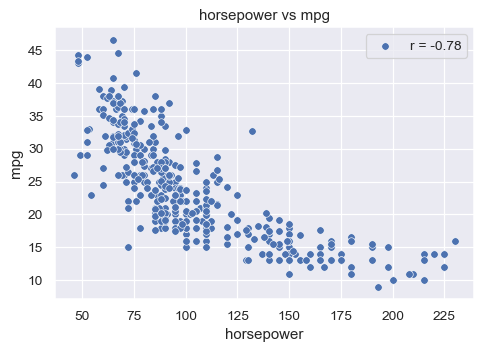

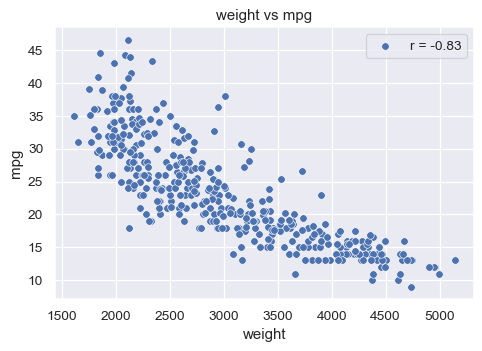

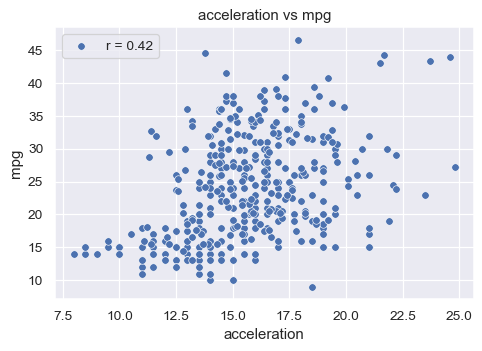

In [60]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]

for X in num_features:
    plt.title(f"{X} vs mpg")
    r = round(np.corrcoef(mpg.dropna()[X], mpg.dropna()["mpg"])[0, 1], 2)
    sns.scatterplot(data=mpg, x=X, y="mpg", label=f"r = {r:0.2f}")
    plt.legend()
    plt.show()

### *corrrelation* - 

  ####  Correlation is a statistical measure that expresses the extent to which two variables are linearly related . It is a measure of association of variables that can be used to test relationships between quantitative or categorical variables . Correlation can range from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation
  
`insights`
    <span style="color:brown">
    we can see that our data has fairly high correlation. its means if increase the value of     one variable the other will increase or decrease .
    now we know we can use linear regression model . </span>

In [61]:
#its time to build a machine learning model . first we import necessary libraries and classes
# sklearn or skicit learn is a very famous machine learning library used to build models.
#------------------- Transformers and Data Pipelines------------------
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline # sequential pipeline
from sklearn.compose import ColumnTransformer
#base classes of sklearn library . every classes inherits these classes. 
from sklearn.base import BaseEstimator, TransformerMixin 
#----------------------------------------------------------------------

#-----------------------Data Sampling----------------------------------
from sklearn.model_selection import train_test_split 

# this function divides the data into training and test set. (xtrain,xtest,ytrain,ytest)
#----------------------------------------------------------------------

#-----------------------Machine Learning Models------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor #stochastic gradient descent resgression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#-----------------------------------------------------------------------

#-----------------------Evaluation Metrices------------------------------
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def rmse(y, y_hat): #root of mean squared error
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)

## Terminologies

<span style="color:red">**Simple Imputer**</span> - SimpleImputer is a class in the scikit-learn library that helps in handling missing data in a dataset. It replaces the NaN values with a specified placeholder. It is implemented by the use of the SimpleImputer() method which takes the following arguments:

`missing values`: The missing values placeholder which has to be imputed.
strategy: The data which will replace the NaN values from the dataset. The `strategy` argument can take the values – ‘mean’ (default), ‘median’, ‘most_frequent’ and ‘constant’.

<span style="color:red">__StandardScaler__</span>- Standard scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation 
    
         formula = (value-mean)/deviation
    

<span style="color:red">__Ordinal endcoder__</span> - Ordinal encoding is a technique used to transform categorical data into numerical data. It involves mapping each unique label to an integer value. . In ordinal encoding, each unique category value is assigned an integer value based on their ordinal relationship to one another. For example, “red” is 1, “green” is 2, and “blue” is 3. This is called an ordinal encoding or an integer encoding and is easily reversible.
    
<span style="color:red">__One hot encoder__</span> - One hot encoding is a process of converting categorical data variables into numerical data variables. In this process, each categorical value is converted into a new categorical column and assigned a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector

<span style="color:green">__Pipeline__</span> - A pipeline in machine learning is a sequence of data preprocessing and modeling steps that are combined to create a single process. It simplifies the workflow by automating the various stages of machine learning, from preprocessing the data to making predictions.

<span style="color:blue">__mean squared error__</span>-The mean squared error (MSE) is a statistical measure of how close the predictions are to the actual values. It measures the average of the squares of the errors, which is the average squared difference between the estimated values and the actual value.

<span style="color:brown">__r2 score__</span> - r2 score is used to checking the accuracy of model.

<span style="color:red">__transformer__</span> - transformers converts the data into required type . like it can fill the missing values (simple imputer) or can we make our custom tranform to add additional columns as per our requirements.
every tranformer,estimator has these three methods :-
`fit` - which is used in training it learn the value of coefficent
`tranform`- it tranforms the data . 
`fit_tranform` - we can do above steps simultenouly . it can only be applied on training data .do not apply on test data.

In [62]:
#making our custom tranformer to process the name column and extract the company name from the column . thus making it a 
# categorical column which is easy to encode we will encode this column using ordinal encoder as this column has more than 20
# categories so one hot can't be applied . then we will scaled the data. to match the scaling of all features. 


#---------------------Custom Transformer-----------------------------------
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
    def fit(self, X, y=None):
        # X -> Data Frame 
        return self  
    def transform(self, X, y=None):
        X[self.in_column] = X[self.in_column].str.split(" ", expand=True)[0] #first column is name of company
        return X
    def fit_transform(self, X, y=None):
        self.fit(X, y) # parameter 
        return self.transform(X, y) # act to transform
#-------------------------------------------------------------------------------  



## <span style="color:#1221FF"> steps to build a machine learning model </span>
<b>step1</b>. load the data and divide the data into X (data without target feature) and y (label/target).</br>
<b>step2</b>. Now split the data into training set and test set this can be acheived using train_test_split method in sklearn library.<br>
<b>step3</b>. select numerical features ,nomial features and ordinal features we need to transform them through seperate pipeline.</br>
<b>step4.</b> make pipelines to process each type of features </br>
<b>step5.</b> use column tranformer class to concat the resulting arrays into one array . column transformer will run the pipelines parallely to one another.</br>
<b>step6.</b> now we call the fit_tranform method to get the tranformed training data. and transform method to get tranformed test data.we can now scale the complete data . after this our data will be completely ready to feed into machine learning model . we now have fully pre processed data as a ml model requried.</br>
<b>step7.</b> we will now call the function we have made for printing the accurary and error of various models we are giving 
and compare there test accuracy . select the good fit model .

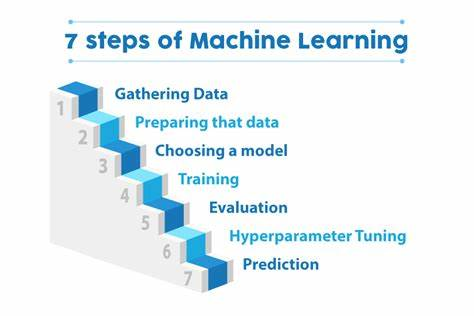

In [63]:
#------------------------------Load and Sample Data Into Train and Test Datasets----------------------------

mpg = sns.load_dataset("mpg")
X = mpg.drop("mpg", axis=1) # features
y = mpg["mpg"] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=131)
# sampling
#------------------------------------------------------------------------------------------------------------

#-------------------------------Feature Selection for Data Prepration or Data Modeling for ML Model-----------
num_features = ["displacement", "horsepower", "weight", "acceleration"] # num_pipeline
nominal_columns = ["origin"] # 1 column --> OneHotEncoder  # -> 3 columns
ordinal_columns = ["name", "model_year", "cylinders"] # 
#pass_through_columns = ["cylinders"]
#drop_columns = ["model_year"]
#--------------------------------------------------------------------------------------------------------------

#------------------------------Data Pipelines to get data ready for ML Model------------------------------------

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),# T1
    #("scaler", StandardScaler())# T2
]) # 4 columns --> T1 -> T2 --> 4 columns 

cat_pipeline = Pipeline([
    ("feature adder", FeatureAdder()), # T1
    ("ordinal encoder", OrdinalEncoder()) # T2
]) # 1 column -> T1 -> T2 -> 1 column


pipeline = ColumnTransformer([
    ("num pipeline", num_pipeline, num_features), # 4 column "displacement", "horsepower", "weight", "acceleration" 
    ("nominal transformer", OneHotEncoder(), nominal_columns), # 3 column  "europe", "japan", "usa"
    ("ordinal transformer", cat_pipeline, ordinal_columns), # 1 column -> "company name", "model year"
    #("dont' change", "passthrough", pass_through_columns), # 1 column -> "cylinders"
    #("drop columns", "drop", drop_columns) # ?
])
#-------------------------------------------------------------------------------------------------------------------

#-----------------------Transforming Training and Test Datasets using Data Pipelines---------------------------------
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr = scaler.transform(X_test_tr)
#---------------------------------------------------------------------------------------------------------------------


In [64]:
#-----------------------Selecting Various ML Models to Train----------------------------------------------------------
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]

#-----------------------Function to Dry run various Estimators (ML Models) for Model Selection---------
def train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test):
    result = {"Model Name": [], "Train Accuracy": [], "Test Accuracy": [],
             "Train Error": [], "Test Error": []}
    
    title = "|{:^30}|{:^18}|{:^18}|{:^18}|{:^18}|"
    width = 108
    # model name  train accuracy     test accuracy    train error   test error 
    print("_"*width)
    print(title.format("Model Name", "Train Accuracy %", "Test Accuracy %", "Train Error", "Test Error"))
    print("_"*width)
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        tr_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        ts_acc = round(r2_score(y_test, y_hat_test)*100, 2)
        tr_err = round(rmse(y_train, y_hat_train), 2)
        ts_err = round(rmse(y_test, y_hat_test), 2)
        result["Model Name"].append(model)
        result["Train Accuracy"].append(tr_acc)
        result["Test Accuracy"].append(ts_acc)
        result["Train Error"].append(tr_err)
        result["Test Error"].append(ts_err)
        print(title.format(str(model), tr_acc, ts_acc, tr_err, ts_err))
        print("-"*width)
    return pd.DataFrame(result)
#---------------------------------------------------------------------------------------------------------


In [65]:
#-----------------------Selection Good Fit Model out of All Models-----------------------------------------------------
result = train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test)

____________________________________________________________________________________________________________
|          Model Name          | Train Accuracy % | Test Accuracy %  |   Train Error    |    Test Error    |
____________________________________________________________________________________________________________
|      LinearRegression()      |      82.61       |      85.93       |       3.24       |       3.03       |
------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |      82.38       |      85.09       |       3.26       |       3.12       |
------------------------------------------------------------------------------------------------------------
|   DecisionTreeRegressor()    |      100.0       |      77.61       |       0.0        |       3.83       |
------------------------------------------------------------------------------------------------------------
|            SVR() 

# *result*
## linearRegression model is a good fit model as its test accuracy is 85.93% which is fairly enough . we can choose this model to predict the milage . 

`note` - choosing a model is depend on the test accuracy . it depend on the data, we have to check for which model the error is less and accuracy is high and we choose that model . for some models we need to hyper tune the parameter. 

In [66]:
#test our model on real data.

real_data = pd.DataFrame({
    "cylinders": [ 4, 8, 6],
    "displacement": [200, 250, 300],
    "horsepower": [120, 150, 170],
    "weight": [2700, 1500, 3500],
    "acceleration": [10, 12, 15],
    "model_year": [80, 82, 70],
    "origin": ["usa", "japan", "europe"],
    "name": ["amc", "ford", "vw"]
})

In [67]:
# transforming the real data into tranformed data(scaled,imputed etc)
tr_data = pipeline.transform(real_data)
scaler = StandardScaler()
tr_data = scaler.fit_transform(tr_data)
#making object of linear regression . 
lin_model = LinearRegression()
#learning the best fit values of coef_ and intercept_ using training data. Xtrain and y train. 
lin_model.fit(X_train_tr,y_train)


LinearRegression()

In [68]:
#predicting the y or milage for the real data . 
lin_model.predict(tr_data)

array([20.94614621, 32.29582354, 17.00147288])

    these are the predicted milage by our linear regression model for respective cars. 

    --------------------------------------------complete----------------------------------------------------------------------